In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
import os
%matplotlib inline

In [76]:
def DataPro(data):
    lines=data.splitlines()
    TimeList=[float(lines[i].split()[0]) for i in range(len(lines)-1)]
    DataList=[float(lines[i].split()[1]) for i in range(len(lines)-1)]
    return TimeList,DataList

def DataStatis(results):
    statislist=[]
    for name,result in results.items():
        result=DataPro(result)
        TimeList,DataList=np.array(result[0]),np.array(result[1])
        Mean=np.mean(DataList)
        Std=np.std(DataList)
        PpV=np.amax(DataList)-np.amin(DataList)
        print("file'%s'"%name)
        print('Mean value is ',Mean)
        print('STD value is ',Std)
        print('Peak-Peak value is ',PpV)
        print('Noise-to-Signal ratio is ',Std/Mean*(10**6),' ppm\n')
        statislist.append([Mean,Std,PpV])
    return statislist

def ShowData(results,sf=False,filename='outputdata.pdf'):
    plt.figure(figsize=(14,8))
    #plt.ylim(9.5512,9.55175)
    #plt.xlim(TimeList[0],TimeList[-1])
    plt.title('Data')
    plt.xlabel('time/s')
    plt.ylabel('Grad_Hall/V')
    plt.grid(True)
    for name,result in results.items():
        result=DataPro(result)
        TimeList,DataList=np.array(result[0]),np.array(result[1])
        plt.plot(TimeList,DataList,linewidth=0.9,label=name)
        plt.legend()
    if sf==True:
        plt.savefig(filename,type='pdf')
    
    
def FileChosen(folder):
    Files=os.listdir(folder)
    datalist={}
    FileList=[os.path.join(folder,Files[i]) for i in range(len(Files))]
    for i,name in enumerate(FileList):
        print(str(i)+'. '+name)
    try:
        print('Which files do you want to choose?(enter n to end)\n')
        while True:
            ChosenFile=input()
            if ChosenFile=='n':
                print('End!')
                break
            elif (int(ChosenFile)<0) or (int(ChosenFile)>(len(Files)-1)):
                print('Out of Range,Pls input legal number.')
            else:
                ChosenFile=int(ChosenFile)
                with open(FileList[ChosenFile]) as f:
                    data=f.read()
                datalist[Files[ChosenFile]]=data
    except:
        print('Wrong Input!!Please restart again.')
    return datalist

def FFTShow(results,xm=5000,sf=False,filename='outputdata.pdf'):
    plt.figure(figsize=(14,8))
    plt.ylim(-160,-80)
    plt.grid(True)
    plt.title('FFT Result')
    for name,result in results.items():
        result=DataPro(result)
        TimeList,DataList=np.array(result[0]),np.array(result[1])
        grossfft=20*np.log10(2*abs(np.fft.rfft(DataList))/len(DataList))
        grossfft[0]=grossfft[0]-20*np.log10(2)
        #print(grossfft)
        fftresult=grossfft-np.amax(grossfft)
        frerange=np.linspace(0,0.5/(TimeList[2]-TimeList[1]),len(fftresult))
        if xm>0.5/(TimeList[2]-TimeList[1]):
            plt.xlim(0,0.5/(TimeList[2]-TimeList[1]))
        else:
            plt.xlim(0,xm)
        plt.plot(frerange,fftresult,linewidth=0.9,label=name)
        plt.legend()
    if sf==True:
        plt.savefig(filename,type='pdf')

## Choose file

In [37]:
data1=FileChosen('FFTdata/02-更换运放之后/02_data/')
data2=FileChosen('FFTdata/03-换后1/02_data/')

0. FFTdata/02-更换运放之后/02_data/GradHMonitor@22uF_1s2018-02-04-16-39-24.txt
1. FFTdata/02-更换运放之后/02_data/GradHMonitor@22uF_1s2018-02-04-16-39-24.xls
2. FFTdata/02-更换运放之后/02_data/GradHMonitor@22uF_1s2018-02-04-16-39-03.xls
3. FFTdata/02-更换运放之后/02_data/GradH@22uF_1s2018-02-04-16-39-24.xls
4. FFTdata/02-更换运放之后/02_data/GradH@22uF_1s2018-02-04-16-39-24.txt
5. FFTdata/02-更换运放之后/02_data/GradHMonitor@22uF_1s2018-02-04-16-39-03.txt
6. FFTdata/02-更换运放之后/02_data/GradH@22uF_1s2018-02-04-16-39-45.xls
7. FFTdata/02-更换运放之后/02_data/GradH@22uF_1s2018-02-04-16-39-45.txt
Which files do you want to choose?(enter n to end)

3
6
n
End!
0. FFTdata/03-换后1/02_data/GradH@22uF_1s2018-02-04-17-07-59.txt
1. FFTdata/03-换后1/02_data/GradH@22uF_1s2018-02-04-17-07-59.xls
2. FFTdata/03-换后1/02_data/GradHMonitor@22uF_1s2018-02-04-17-07-37.txt
3. FFTdata/03-换后1/02_data/GradHMonitor@22uF_1s2018-02-04-17-07-37.xls
4. FFTdata/03-换后1/02_data/GradHMonitor@22uF_1s2018-02-04-17-07-16.txt
5. FFTdata/03-换后1/02_data/GradH@22uF_1s2018-0

In [38]:
#print(data1)
for key in data1.keys():
    print(key)

for key in data2.keys():
    print(key)

GradH@22uF_1s2018-02-04-16-39-24.xls
GradH@22uF_1s2018-02-04-16-39-45.xls
GradH@22uF_1s2018-02-04-17-07-59.xls
GradH@22uF_1s2018-02-04-17-07-37.xls


## Data Statistic

In [39]:
#print('result1:')
DataStatis(data1)

#print('result2:')
_=DataStatis(data2)

file'GradH@22uF_1s2018-02-04-16-39-24.xls'
Mean value is  9.61513362292
STD value is  0.000304431848778
Peak-Peak value is  0.00155083
Noise-to-Signal ratio is  31.6617387461  ppm

file'GradH@22uF_1s2018-02-04-16-39-45.xls'
Mean value is  9.61511234169
STD value is  0.000303079969509
Peak-Peak value is  0.00146607
Noise-to-Signal ratio is  31.5212093982  ppm

file'GradH@22uF_1s2018-02-04-17-07-59.xls'
Mean value is  9.61431710043
STD value is  0.00010213617306
Peak-Peak value is  0.00058686
Noise-to-Signal ratio is  10.6233414181  ppm

file'GradH@22uF_1s2018-02-04-17-07-37.xls'
Mean value is  9.61431330611
STD value is  0.000104555464306
Peak-Peak value is  0.00058686
Noise-to-Signal ratio is  10.8749799364  ppm



## Show Data

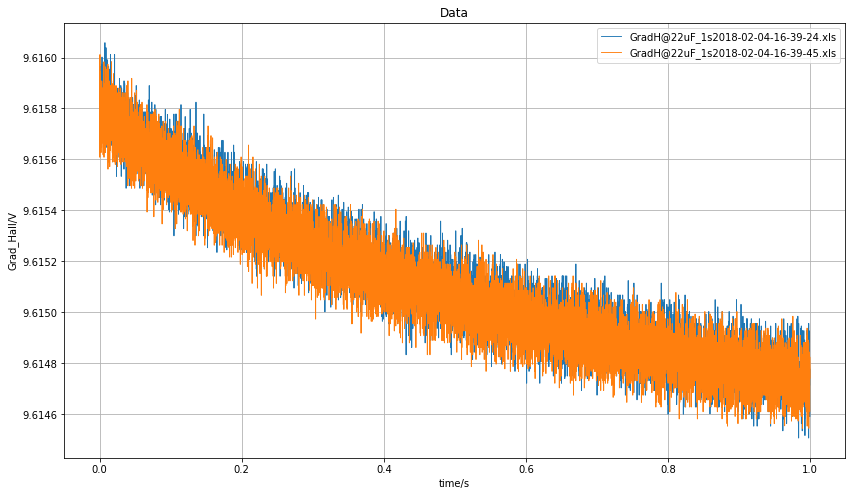

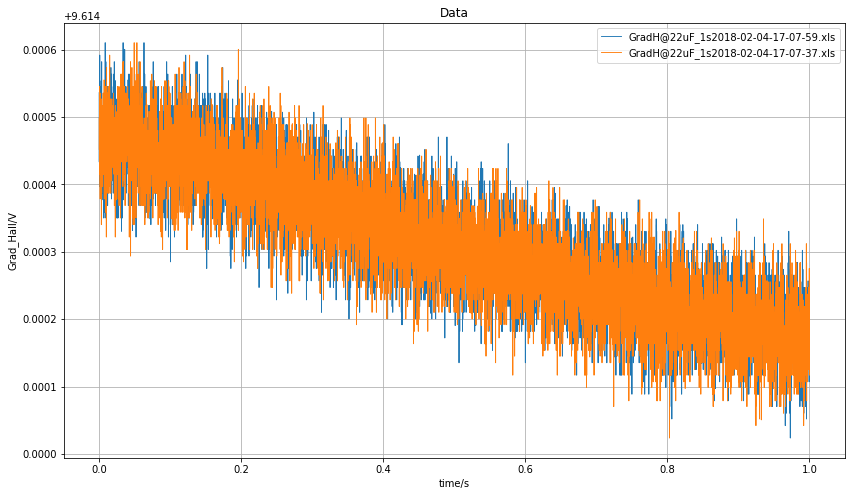

In [77]:
savefig=True #选择是否保存文件
filename1='data1.pdf'
filename2='data2.pdf'
ShowData(data1,sf=savefig,filename=filename1)
ShowData(data2,sf=savefig,filename=filename2)

## Show FFT Results

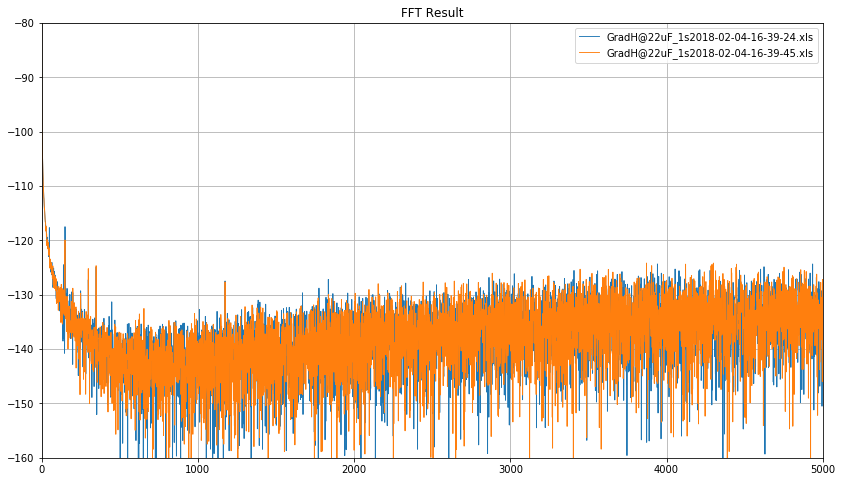

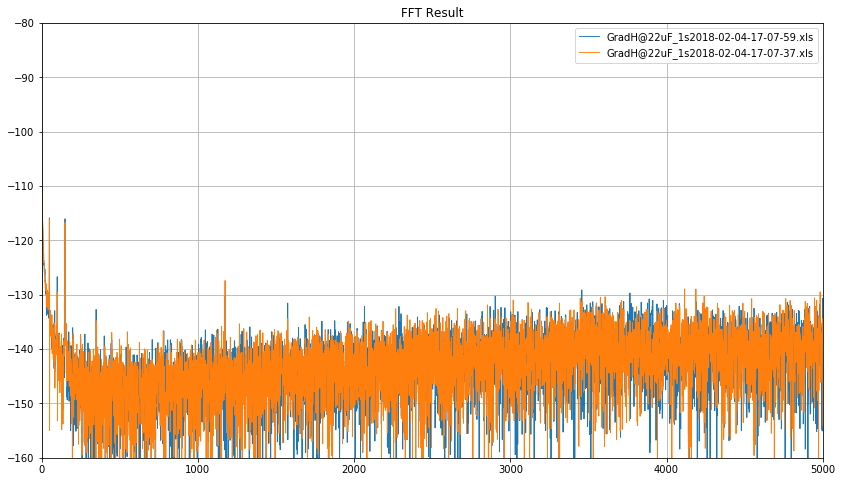

In [78]:
savefig=True #选择是否保存文件
filename1='fft1.pdf'
filename2='fft2.pdf'
FFTShow(data1,sf=savefig,filename=filename1)
FFTShow(data2,sf=savefig,filename=filename2)